## Imports

In [1]:
import pandas as pd
import sqlite3

In [2]:
connect = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

## analyze only the users and not the admins

In [3]:
request = '''
SELECT uid, timestamp 
FROM checker
WHERE uid LIKE 'user_%'
'''
commits = pd.io.sql.read_sql(request, connect, parse_dates=['timestamp'])
commits

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


## the fontsize and the figsize remain the same

## for each hour, calculate the average number of commits on working days and on weekends (if there were no commits in an hour, do not use it to calculate the average) use these values for your graph, for example: Mon, 17-18: 5 commits, Tue, 17-18: 6 commits, Wed, 17-18: 7 commits

In [4]:
commits['weekday'] = commits['timestamp'].dt.dayofweek
commits['hour'] = commits['timestamp'].dt.hour
commits['day'] = commits['timestamp'].dt.day
commits

,uid,timestamp,weekday,hour,day
0,user_4,2020-04-17 05:19:02.744528,4,5,17
1,user_4,2020-04-17 05:22:35.249331,4,5,17
2,user_4,2020-04-17 05:22:45.549397,4,5,17
3,user_4,2020-04-17 05:34:14.691200,4,5,17
4,user_4,2020-04-17 05:34:24.422370,4,5,17
...,...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,3,20,21
3203,user_1,2020-05-21 20:22:41.785725,3,20,21
3204,user_1,2020-05-21 20:22:41.877806,3,20,21
3205,user_1,2020-05-21 20:37:00.129678,3,20,21


In [5]:
commits['type'] = commits['weekday'].apply(
    lambda x: 'working_day' if x < 5 else 'weekend')
commits

,uid,timestamp,weekday,hour,day,type
0,user_4,2020-04-17 05:19:02.744528,4,5,17,working_day
1,user_4,2020-04-17 05:22:35.249331,4,5,17,working_day
2,user_4,2020-04-17 05:22:45.549397,4,5,17,working_day
3,user_4,2020-04-17 05:34:14.691200,4,5,17,working_day
4,user_4,2020-04-17 05:34:24.422370,4,5,17,working_day
...,...,...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,3,20,21,working_day
3203,user_1,2020-05-21 20:22:41.785725,3,20,21,working_day
3204,user_1,2020-05-21 20:22:41.877806,3,20,21,working_day
3205,user_1,2020-05-21 20:37:00.129678,3,20,21,working_day


In [6]:
commits_groupped = commits.groupby(['type', 'day', 'hour']).count()
commits_groupped = commits_groupped.groupby(
    ['type', 'hour']).mean()['uid'].reset_index()
commits_groupped

,type,hour,uid
0,weekend,0,2.000000
1,weekend,1,6.000000
2,weekend,3,1.000000
3,weekend,5,2.000000
4,weekend,7,4.000000
5,weekend,8,7.000000
6,weekend,9,3.666667
7,weekend,10,7.000000
8,weekend,11,23.600000
9,weekend,12,9.500000


In [7]:
pivot_table = pd.pivot(commits_groupped, values='uid',
                       index='hour', columns='type')
pivot_table

type,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,NaN
3,1.000000,2.000000
5,2.000000,7.500000
6,NaN,1.500000
7,4.000000,5.166667
8,7.000000,3.700000
9,3.666667,6.000000
10,7.000000,13.200000


In [8]:
# add thw hole list of hours
hour = pd.DataFrame([i for i in range(0, 24)], columns=['hour'])
pivot_table = hour.merge(pivot_table, how='left', on='hour').set_index('hour')
pivot_table

,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,NaN
2,NaN,NaN
3,1.000000,2.000000
4,NaN,NaN
5,2.000000,7.500000
6,NaN,1.500000
7,4.000000,5.166667
8,7.000000,3.700000


## choose a palette that you really enjoy, you do not have to replicate it from the graph above

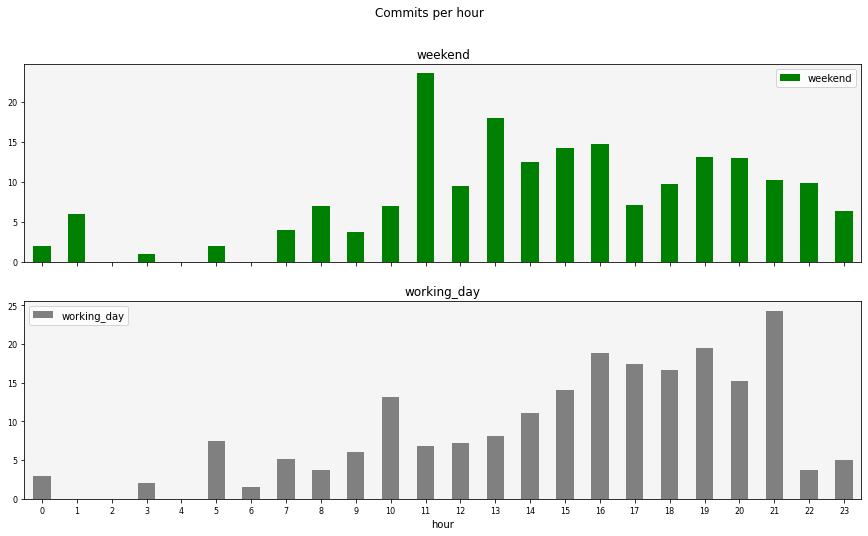

In [9]:
ax = pivot_table.plot(kind='bar',
                      figsize=(15, 8),
                      title='Commits per hour',
                      rot=0,
                      fontsize=8,
                      color=['green', 'grey'],
                      sharex=True,
                      subplots=True)
ax[0].set_facecolor('#F5F5F5')
ax[1].set_facecolor('#F5F5F5')

## at the end of your Jupyter Notebook, create a markdown cell and insert the question

## Is the dynamic different on working days and weekends?

In [10]:
pivot_table[pivot_table['working_day'] == pivot_table['working_day'].max()]

,weekend,working_day
hour,,
21,10.285714,24.333333


In [11]:
pivot_table[pivot_table['weekend'] == pivot_table['weekend'].max()]

,weekend,working_day
hour,,
11,23.6,6.769231


In [12]:
connect.close()